### 단변량 카이제곱 검정

*적합도 검정 (Goodness of Fit Test)*

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

#### 1. 다음은 미국에서 592명 성인 남녀 (표본)의 눈색을 정리해 놓은 도수분포표 이다. <br>
카이제곱 검정을 실시해 보자.

In [2]:
eye = pd.Series(data=[220, 215, 93, 64],index=['Brown','Blue','Hazel','Green'])
eye

Brown    220
Blue     215
Hazel     93
Green     64
dtype: int64

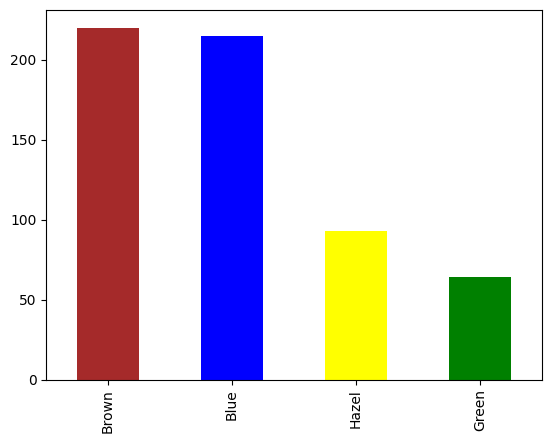

In [3]:
eye.plot.bar(color=['brown','blue','yellow','green'])
plt.show()

#### 2. 디폴트 모형을 귀무 가설로 설정하고 가설검정을 실시한다.

디폴트 모형 사용 #1.

In [4]:
st.chisquare(f_obs=eye)

Power_divergenceResult(statistic=133.47297297297297, pvalue=9.650879774148268e-29)

디폴트 모형 사용 #2.

In [5]:
eye_expected = len(eye)*[eye.mean()]
eye_expected

[148.0, 148.0, 148.0, 148.0]

In [6]:
stat, p_val = st.chisquare(f_obs=eye,f_exp=eye_expected)
print("p_value : {}".format(np.round(p_val,3)))

p_value : 0.0


검정통계량 계산해 보기.

In [7]:
stat = ((eye-eye.mean())**2/eye.mean()).sum()
stat

133.47297297297297

p-값 계산해 보기.

In [8]:
1-st.chi2.cdf(stat,len(eye)-1)

0.0

#### 3. 모형을 제시하고 가설검정을 실시한다.

In [9]:
stat, p_val = st.chisquare(f_obs = eye, f_exp = np.array([0.41,0.32,0.15,0.12])*eye.sum())
print("p_value : {}".format(np.round(p_val,3)))

p_value : 0.091


In [10]:
np.array([0.41,0.32,0.15,0.12])*eye.sum()

array([242.72, 189.44,  88.8 ,  71.04])